In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import random

<h1>World records as measures of senescence</h1>

This exercise consists of running simulations with three probabilities functions (normal, exponential and lognormal) to show that sample size is a major issue with the study of senescence and drops in perfomance: https://callingbullshit.org/case_studies/case_study_track_records.html


<h1>Scale records by performance in relation to the world record</h1>

In [2]:
#For min
def scale_records(data):
    record = min(data)
    data_scaled = [record/x for x in data]
    return data_scaled

#For max
def scale_data(data):
    best = max(data)
    data_scaled = [x/best for x in data]
    return data_scaled

<h1>Plot the data scaled to perfomance in relation to the world record</h1>

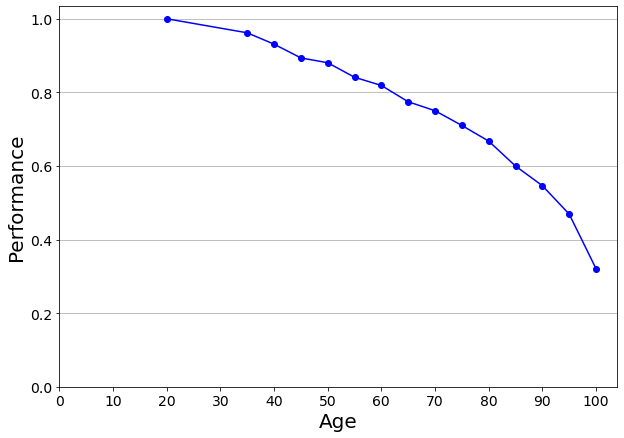

In [3]:
#records in 2019
#records_100 = [9.85, 9.87, 9.93, 10.72, 10.88, 11.30, 11.70, 12.31, 12.77, 13.49, 14.35, 15.08, 17.53, 20.41, 23.4]

#records in 2016
records_100 = [9.58, 9.96, 10.29, 10.72, 10.88, 11.39, 11.70, 12.37, 12.77, 13.49, 14.35, 15.97, 17.53, 20.41, 29.83]
age = [20,35,40,45,50,55,60,65,70,75,80,85,90,95,100]


#scale the records in scores of perfomance in relation to the world record.
records_100_scaled = scale_records(records_100)
    
#plot the evolution of performance according the age
plt.figure(figsize=(10,7))
plt.plot(age, records_100_scaled,'bo-')
plt.xlabel('Age', fontsize=20)
plt.ylabel('Performance', fontsize=20)
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(np.arange(0, 1.2, 0.2), fontsize=14)
plt.grid(axis = 'y')
plt.show()

<h1>The actual simulation happens here. It's based on inverse transform sampling.</h1>

<a href="https://en.wikipedia.org/wiki/Inverse_transform_sampling">https://en.wikipedia.org/wiki/Inverse_transform_sampling</a>

In [4]:
#sample sizes
populations = [1000000, 100000, 10000, 1000, 100, 10]

#inverse transform sampling
def inverse_transform_sampling(distribution, populations):
    samples = []
    for population_size in populations:
        best = []
        #run it 10 times
        for i in range(0,10):
            U = np.random.uniform(size=population_size)
            #normal distribution
            if distribution == 1:
                best.append(max(stats.norm.ppf(U)))
            elif distribution == 2:
                best.append(max(stats.expon.ppf(U)))
            else:
                best.append(max(stats.lognorm.ppf(q = U, s = 1)))
        samples.append(np.mean(best))
    return samples

In [5]:
records_normal = inverse_transform_sampling(1, populations)
records_exponential = inverse_transform_sampling(2, populations)
records_lognormal = inverse_transform_sampling(3, populations)

<h1>Scale data</h1>

In [6]:
y_normal = scale_data(records_normal)
y_exponential = scale_data(records_exponential)
y_lognormal = scale_data(records_lognormal)
x = [1,2,3,4,5,6]

<h1>Plot the results of simulations</h1>

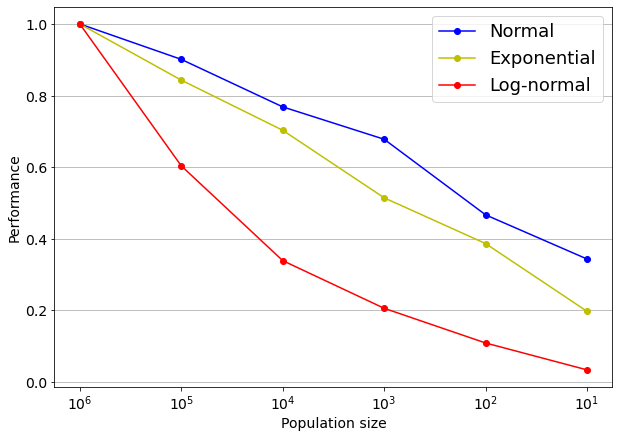

In [7]:
plt.figure(figsize=(10,7))
plt.plot(x,y_normal, 'bo-', label ='Normal')
plt.plot(x,y_exponential, 'yo-', label ='Exponential')
plt.plot(x,y_lognormal, 'ro-', label ='Log-normal')
plt.legend(fontsize=18)
plt.xlabel('Population size', fontsize=14)
plt.ylabel('Performance', fontsize=14)
plt.xticks([1,2,3,4,5,6],  ["$10^6$", "$10^5$", "$10^4$", "$10^3$", "$10^2$", "$10^1$"], fontsize=14)
plt.yticks(np.arange(0, 1.2, 0.2), fontsize=14)
plt.grid(axis = 'y')
